# inroduction to dataset

In [90]:
import numpy as np
import pandas as pd
import os
from tensorflow import keras
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from sklearn import model_selection, linear_model
from keras.models import Sequential

In [91]:
# Importing data into python from the given csv file
data= pd.read_csv('SVM/data.csv')

In [92]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [93]:
data = data.drop(['Unnamed: 32', 'id'], axis=1)

In [94]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [95]:
data['diagnosis']= data['diagnosis'].replace('M', 1)
data['diagnosis']= data['diagnosis'].replace('B', 0)

In [96]:
X = data.drop('diagnosis', axis=1)
Y = data.pop('diagnosis')

In [97]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [98]:
scaler=MinMaxScaler()

In [99]:
X=scaler.fit_transform(X)
#Y=scaler.fit_transform(Y)

# Splitting the Data

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [101]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=5)

# create the model

In [102]:
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

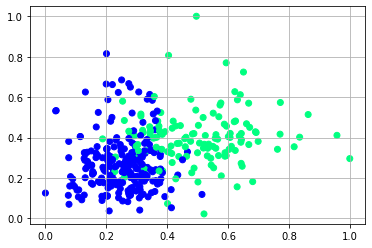

In [121]:
#x_set,y_set=make_blobs(n_samples=400 ,centers=2 ,cluster_std=0.60 ,random_state=0)
plt.scatter(X_train[:,0] ,X_train[:,1], c=y_train , cmap='winter')
plt.grid()

In [122]:
svc=SVC(C=50,kernel="rbf",gamma='auto')
svc.fit(X_train , y_train)

SVC(C=50, gamma='auto')

In [123]:
pridect=svc.predict(X_test)
print('Accuracy',accuracy_score(y_test,pridect))

Accuracy 0.9824561403508771


In [124]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [125]:
print(pridect)
print(y_test)

[1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1
 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0
 1 1 1]
28     1
163    0
123    0
361    0
549    0
      ..
414    1
515    0
186    1
3      1
261    1
Name: diagnosis, Length: 114, dtype: int64


In [126]:
#Confusion Matrix
cm = confusion_matrix(y_test,svc.predict(X_test))
cm

array([[66,  0],
       [ 2, 46]], dtype=int64)

In [127]:
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve

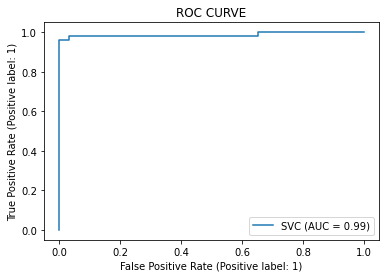

In [128]:
#rock curve
fig = plot_roc_curve(svc,X_test,y_test)
plt.title("ROC CURVE")
([0, 1], [0, 1], 'y--')
plt.show()

In [129]:
y_val_pred = svc.predict(X_val)

In [130]:
print("Accuracy: " , accuracy_score(y_val , y_val_pred))

Accuracy:  0.989010989010989


In [131]:
#classifier = Sequential()

In [132]:
#mlp=MLPClassifier(activation="relu",max_iter=3000)

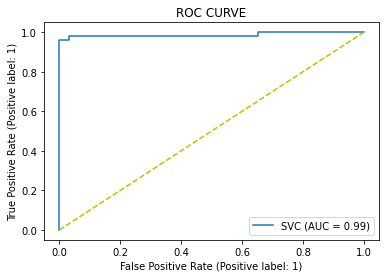

In [133]:
fig = plot_roc_curve(svc,X_test,y_test)
plt.title("ROC CURVE")
plt.plot([0, 1], [0, 1], 'y--')
plt.show()

In [134]:
#Confusion Matrix
cm = confusion_matrix(y_test,svc.predict(X_test))
cm


array([[66,  0],
       [ 2, 46]], dtype=int64)

In [135]:
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
#from sklearn import cross_validafrom
from sklearn.model_selection import ShuffleSplit
#import sklearn.cross_validation.ShuffleSplit

In [136]:
#X, y = load_digits(return_X_y=True)
X=X_train
y=y_train
#cv = ShuffleSplit (n_splits=5, test_size=0.2, random_state=0)

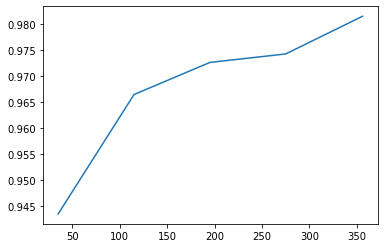

In [137]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(svc, X, y, cv=50,return_times=True)
plt.plot(train_sizes,np.mean(train_scores,axis=1))

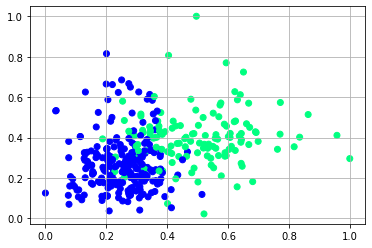

In [138]:
plt.scatter(X_train[:,0] ,X_train[:,1], c=y_train , cmap='winter')
plt.grid()